# Hypothesis Testing - Overview

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
alpha = 0.05

### Do your work for this exercise in a jupyter notebook named hypothesis_testing.ipynb.

### For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

### 1. Has the network latency gone up since we switched internet service providers?


#### Has the network latency gone up since we switched internet service providers?
#### Null Hypothesis: The networklatency has not gone up since we switched internet service providers.
#### Alt Hypothesis: The networklatency has gone up since we switched internet service providers.
#### True Pos: We correctely fail to reject that the network latency has not gone up since we switched internet service providers.
#### True Neg: We correctely reject that that the network latency has not gone up since we switched internet service providers.
#### Type 1: We incorrecly say that latency gone up since switching when there is.
#### Type II: We incorrectly say that the latency didn't go up when it did.

### 2. Is the website redesign any good?

#### Null Hypothesis: The website redesign has no good effect.
#### Alt Hypothesis: The website redesign has a good effect.
#### True Pos: We correctely fail to reject that the redesign has no good effect.
#### True Neg: We correctely reject that the the redesign has no good effect.
#### Type 1: We incorrecly say that that the redesin has a good effect when it does not.
#### Type II: We incorrectly say that the redesign has no effect when it actually does.


### 3. Is our television ad driving more sales?

#### Null Hypothesis: Our television add doesn't increase more sales.
#### Alt Hypothesis: Our television add increase more sales.
#### True Pos: We correctely fail to reject that our television add increase more sales.
#### True Neg: We correctely reject that our television add increase more sales.
#### Type 1: We incorrecly say that that our television add increase more sales when it does not.
#### Type II: We incorrectly say that our television add doesn't increase more sales when it actually does.

# Hypothesis Testing - T - Test

### 1. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [2]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data


In [3]:
Office1_mean = 90
Office1_std_dev = 15
n1 = 40

Office2_mean = 100
Office2_std_dev = 20
n2 = 50

alpha = .05

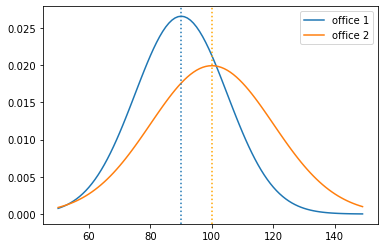

In [4]:
x = np.arange(50,150)

y1 = stats.norm(90,15).pdf(x)
y2 = stats.norm(100,20).pdf(x)


plt.plot(x, y1, label = 'office 1')
plt.plot(x, y2, label = 'office 2')
plt.axvline(90, ls = ':')
plt.axvline(100, ls = ':', color = 'orange')

plt.legend()

In [5]:
t, p = stats.ttest_ind_from_stats(90,15,40, 100,20,50, equal_var=False)
t,p,alpha

(-2.7091418459143854, 0.00811206270346016, 0.05)

In [6]:
# p-value (0.00811206270346016) and alpha value (0.05)

if p <  alpha:
    print("We reject the null hypothesis")
else: 
    print(" We fail to reject the null hypothesis")

We reject the null hypothesis


### 2. Load the mpg dataset and use it to answer the following questions:

### a. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [7]:
from pydataset import data
mpg = data('mpg')

In [8]:
mpg['fuel_efficiency'] = stats.hmean(mpg[['cty', 'hwy']], axis =1)

In [9]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [10]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   manufacturer     234 non-null    object 
 1   model            234 non-null    object 
 2   displ            234 non-null    float64
 3   year             234 non-null    int64  
 4   cyl              234 non-null    int64  
 5   trans            234 non-null    object 
 6   drv              234 non-null    object 
 7   cty              234 non-null    int64  
 8   hwy              234 non-null    int64  
 9   fl               234 non-null    object 
 10  class            234 non-null    object 
 11  fuel_efficiency  234 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 23.8+ KB


In [11]:
# drop nulls
mpg = mpg.dropna()

In [12]:
mpg["average_mpg"] = (mpg.cty + mpg.hwy)/2

In [13]:
fe_2008 = mpg[mpg.year == 2008].average_mpg
fe_1999 = mpg[mpg.year == 1999].average_mpg

<AxesSubplot:>

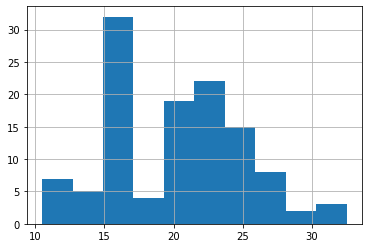

In [14]:
fe_2008.hist()

<AxesSubplot:>

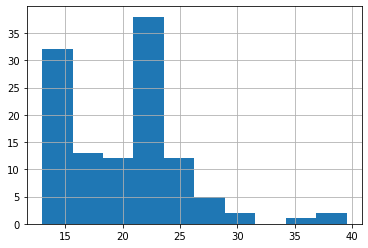

In [15]:
fe_1999.hist()

Hypothesis:
    
$H_{0}$: Fuel effciency is the same in cars from 2008 and 1999.
    
$H_{a}$: Fuel effciency is NOT the same in cars from 2008 and 1999.
    
    
Significance Level:
    
$\alpha$ is already set to .05 (95% confidence level)


Verify Assumptions:
    
Normal: yes
    
Independent: yes
    
Variance: No

In [16]:
fe_2008.var(), fe_1999.var()

(24.097480106100797, 27.122605363984682)

In [17]:
t, p = stats.ttest_ind(fe_2008, fe_1999, equal_var= False)

t, p, alpha

(-0.21960177245940962, 0.8263750772060638, 0.05)

### Decide
### is p-value less than alpha?

In [18]:
if p <  alpha:
    print("We reject the null hypothesis")
else: 
    print(" We fail to reject the null hypothesis")

 We fail to reject the null hypothesis


### Cannot reject Null Hypothesis meaning Null Hypothesis is true So, Fuel effciency is the same in cars from 2008 and 1999.

### 2. b. Are compact cars more fuel-efficient than the average car?

In [20]:
compact_fuel_efficiency = mpg[mpg['class'] == 'compact'].fuel_efficiency
avg_car_fuel_efficiency = mpg.fuel_efficiency.mean()

In [22]:
t,p = stats.ttest_1samp(compact_fuel_efficiency, avg_car_fuel_efficiency)
t, p/2, alpha

(7.512360093161354, 7.808833174403864e-10, 0.05)

In [24]:
if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


### 2. c. Do manual cars get better gas mileage than automatic cars?

In [25]:
manual_fuel_efficiency = mpg[mpg.trans.str.contains('manual')].fuel_efficiency


auto_fuel_efficiency = mpg[mpg.trans.str.contains('auto')].fuel_efficiency


In [26]:
manual_fuel_efficiency.var(), auto_fuel_efficiency.var()

(25.665633639828275, 20.428279095002054)

In [27]:
t, p = stats.ttest_ind(manual_fuel_efficiency, auto_fuel_efficiency, equal_var = False)
t, p/2, alpha

(4.47444321386703, 7.99035135103976e-06, 0.05)

In [29]:
if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


# Hypothesis Testing - Correlation

### 1. Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [30]:
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns

In [31]:
url = "https://gist.githubusercontent.com/ryanorsinger/3fce5a65b5fb8ab728af5192c7de857e/raw/a0422b7b73749842611742a1064e99088a47917d/clean_telco.csv"
df = pd.read_csv(url, index_col="id")
df.head(4)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_int,payment_type,monthly_charges,...,tenure_month,has_churned,has_phone,has_internet,has_internet_and_phone,partner_dependents,start_day,phone_type,internet_type,contract_type
id,,,,,,,,,,,,,,,,,,,,,
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,...,9.0,False,True,True,True,3,2020-05-03,One Line,DSL,1 Year
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,...,9.1,False,True,True,True,0,2020-05-03,Two or More Lines,DSL,Month-to-Month
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,...,3.8,True,True,True,True,0,2020-11-03,One Line,Fiber Optic,Month-to-Month
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,...,12.6,True,True,True,True,1,2020-02-03,One Line,Fiber Optic,Month-to-Month


In [32]:
df.head(4).T


id,0,1,2,3
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF
gender,Female,Male,Male,Male
is_senior_citizen,0,0,0,1
partner,Yes,No,No,Yes
dependents,Yes,No,No,No
phone_service,1,2,1,1
internet_service,1,1,2,2
contract_int,1,0,0,0
payment_type,Mailed check,Mailed check,Electronic check,Electronic check
monthly_charges,65.6,59.9,73.9,98.0


$H_o$: tenure and monthly charges are not linearly correlated
    
$H_a$: tenure and monthly charges are linearly correlated



### Next

$H_o$: tenure and total charges are not linearly correlated
    
$H_a$: tenure and total charges are linearly correlated

### Next

Control for Phone and Internet Service

In [34]:
confidence_level = 0.95
alpha = 1 - confidence_level
alpha

0.050000000000000044

In [35]:
# 𝐻𝑜 : tenure and monthly charges are not linearly correlated
# 𝐻𝑎 : tenure and monthly charges are linearly correlated

corr, p = stats.pearsonr(df.tenure_month, df.monthly_charges)

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
    
corr, p

We reject the null hypothesis


(0.24602222678861455, 1.8834273042677756e-97)

In [36]:
# 𝐻𝑜 : tenure and total charges are not linearly correlated
# 𝐻𝑎 : tenure and total charges are linearly correlated

corr, p = stats.pearsonr(df.tenure_month, df.total_charges)

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
    
corr, p

We reject the null hypothesis


(0.8257328669183033, 0.0)

In [37]:
def correlation_test(x, y):
    message = ""
    corr, p = stats.pearsonr(x, y)
    
    if p < alpha:
        message = "reject the null hypothesis that there is no linear correlation. Evidence supports a linear correlation." 
    else:
        message = "fail to reject the null hypothesis that there is no linear correlation. Insufficient evidence to support a linear correlation between the two values."
    
    return corr, p, message


In [38]:
# We'll run a correlation test for 
df.phone_type.value_counts()

One Line             3386
Two or More Lines    2966
No Phone Service      680
Name: phone_type, dtype: int64

In [39]:
df.internet_type.value_counts()

Fiber Optic            3097
DSL                    2413
No Internet Service    1522
Name: internet_type, dtype: int64

In [40]:
# Let's combine all these different values together
df["telecom_setup"] = df.internet_type + " " + df.phone_type
df.head().T

id,0,1,2,3,4
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
is_senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
phone_service,1,2,1,1,1
internet_service,1,1,2,2,2
contract_int,1,0,0,0,0
payment_type,Mailed check,Mailed check,Electronic check,Electronic check,Mailed check
monthly_charges,65.6,59.9,73.9,98.0,83.9


In [41]:
df.telecom_setup.value_counts()

Fiber Optic Two or More Lines            1937
No Internet Service One Line             1182
Fiber Optic One Line                     1160
DSL One Line                             1044
DSL Two or More Lines                     689
DSL No Phone Service                      680
No Internet Service Two or More Lines     340
Name: telecom_setup, dtype: int64

In [42]:
options = df.telecom_setup.value_counts().index
options

Index(['Fiber Optic Two or More Lines', 'No Internet Service One Line',
       'Fiber Optic One Line', 'DSL One Line', 'DSL Two or More Lines',
       'DSL No Phone Service', 'No Internet Service Two or More Lines'],
      dtype='object')

In [43]:
options[1]

'No Internet Service One Line'

In [44]:
# Run through the set of all options for tenure vs. monthly_charges

output = []

for option in options:
    subset = df[df.telecom_setup == option]
    corr, p, message = correlation_test(subset.tenure_month, subset.monthly_charges)
    result = {
        "option": option,
        "corr": corr,
        "p": p,
        "message": message
    }
    output.append(result)

print("Correlation test for tenure vs. monthly_charges, controling for Internet/Phone service")
pd.DataFrame(output)

Correlation test for tenure vs. monthly_charges, controling for Internet/Phone service


,option,corr,p,message
0,Fiber Optic Two or More Lines,0.573677,6.125936e-170,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
1,No Internet Service One Line,-0.012010,6.799938e-01,fail to reject the null hypothesis that there is no linear correlation. Insufficient e...
2,Fiber Optic One Line,0.529938,5.607453e-85,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
3,DSL One Line,0.561734,7.199649e-88,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
4,DSL Two or More Lines,0.610191,1.647669e-71,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
5,DSL No Phone Service,0.591798,1.736039e-65,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
6,No Internet Service Two or More Lines,-0.031353,5.645227e-01,fail to reject the null hypothesis that there is no linear correlation. Insufficient e...


<AxesSubplot:xlabel='tenure_month', ylabel='monthly_charges'>

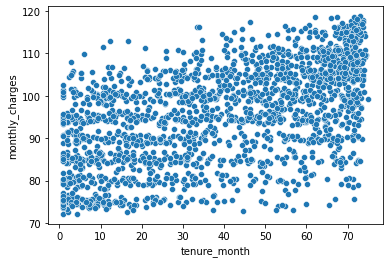

In [45]:
fiber_2_lines = df[df.telecom_setup == "Fiber Optic Two or More Lines"]
sns.scatterplot(x="tenure_month", y="monthly_charges", data=fiber_2_lines)

<AxesSubplot:xlabel='tenure_month', ylabel='monthly_charges'>

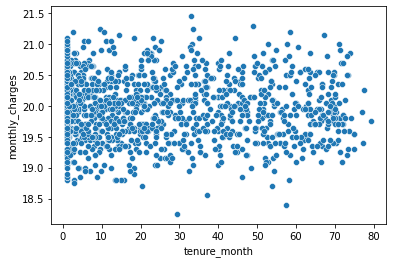

In [46]:
no_internet_one_line = df[df.telecom_setup == "No Internet Service One Line"]
sns.scatterplot(x="tenure_month", y="monthly_charges", data=no_internet_one_line)

<AxesSubplot:xlabel='tenure_month', ylabel='monthly_charges'>

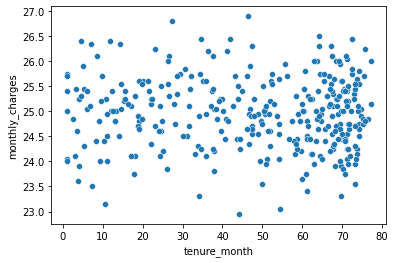

In [47]:
no_internet_multiple_lines = df[df.telecom_setup == "No Internet Service Two or More Lines"]
sns.scatterplot(x="tenure_month", y="monthly_charges", data=no_internet_multiple_lines)

In [48]:
# Run through the set of all options for tenure vs. total_charges

output = []

for option in options:
    subset = df[df.telecom_setup == option]
    corr, p, message = correlation_test(subset.tenure_month, subset.total_charges)
    result = {
        "option": option,
        "corr": corr,
        "p": p,
        "message": message
    }
    output.append(result)

print("Correlation test for tenure vs. total_charges, controling for Internet/Phone service") 
pd.DataFrame(output)


Correlation test for tenure vs. total_charges, controling for Internet/Phone service


,option,corr,p,message
0,Fiber Optic Two or More Lines,0.983949,0.0,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
1,No Internet Service One Line,0.999276,0.0,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
2,Fiber Optic One Line,0.987473,0.0,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
3,DSL One Line,0.974246,0.0,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
4,DSL Two or More Lines,0.967037,0.0,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
5,DSL No Phone Service,0.954261,0.0,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
6,No Internet Service Two or More Lines,0.998031,0.0,reject the null hypothesis that there is no linear correlation. Evidence supports a li...


### 3. Use the sleepstudy data. Is there a relationship between days and reaction time?

In [50]:

from pydataset import data
df = data("sleepstudy")
df.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


$H_o$: There is no linear correlation between days and reaction time

$H_a$: There is a linear correlation between days and reaction time

In [51]:
corr, p = stats.pearsonr(df.Days, df.Reaction)

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

corr, p


We reject the null hypothesis


(0.5352302262650253, 9.894096322214812e-15)

# Hypothesis Testing - Chi Square

In [56]:
# imports
import numpy as np
import pandas as pd
import scipy.stats as stats
from pydataset import data


### 1. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

### 	                                Codeup Student	Not Codeup Student

### Uses a Macbook	                   49	                      20

### Doesn't Use A Macbook         1                          30


In [53]:
# Set the signifance level
conf_interval = 0.95
alpha = 1 - conf_interval

In [54]:
# create a dataframe:

contingency = pd.DataFrame({'codeup_student': [49,1], 'not_codeup': [20,30]}, index=['uses_macbook', 'not_macbook'])

In [55]:
contingency

,codeup_student,not_codeup
uses_macbook,49,20
not_macbook,1,30


### H0: Macbook Usage is independent of being a Codeup Student
### Ha: Macbook Usage is not independent of being a Codeup Student

In [ ]:
# make our computation

In [57]:
chi2, p, degf, expected = stats.chi2_contingency(contingency)

print('Observed\n:')
print(contingency.values)
print('------------------------\nExpected: \n')
print(expected)
print('------------------------\n')
print(f'chi2 = {chi2:.2f}')
print(f'p value: {p:.4f}')
if p < alpha:
      print('We can reject the null hypothesis')


Observed
:
[[49 20]
 [ 1 30]]
------------------------
Expected: 

[[34.5 34.5]
 [15.5 15.5]]
------------------------

chi2 = 36.65
p value: 0.0000
We can reject the null hypothesis


### 2. Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [ ]:
# load up our mpg data

In [58]:
df = data('mpg')

In [59]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [60]:
df['transmission_type'] = np.where(df.trans.str.contains('auto'), 'Auto', 'Manual')

In [61]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,transmission_type
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,Auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,Manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,Manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,Auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,Auto


In [62]:
# pick our two categoricals

In [63]:
df.transmission_type.value_counts()

Auto      157
Manual     77
Name: transmission_type, dtype: int64

In [64]:
df['drv'].value_counts()

f    106
4    103
r     25
Name: drv, dtype: int64

In [65]:
a = df.transmission_type
b = df.drv

### H0: Transmission type is not independent of drive type on vehicles.
### HA: Transmission type is independent of drive type on vehicles.

In [66]:
# create a contingency table

observed = pd.crosstab(a,b)
observed

drv,4,f,r
transmission_type,,,
Auto,75,65,17
Manual,28,41,8


In [67]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n:')
print(observed.values)
print('------------------------\nExpected: \n')
print(expected.astype(int))
print('------------------------\n')
print(f'chi2 = {chi2:.2f}')
print(f'p value: {p:.4f}')
if p < alpha:
      print('We can reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

Observed
:
[[75 65 17]
 [28 41  8]]
------------------------
Expected: 

[[69 71 16]
 [33 34  8]]
------------------------

chi2 = 3.14
p value: 0.2084
We fail to reject the null hypothesis
